# 📊 Stock Data Exploration

This notebook explores historical stock price data for NASDAQ-listed companies.  
We’ll inspect, visualize, and clean the data before modeling.


# Import Required Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline


# Download Data from Yahoo Finance

In [53]:
ticker = "AAPL"  # You can change this to any NASDAQ stock
df = yf.download(ticker, start="2017-01-01", end="2025-01-01")
df.to_csv(f'../data/raw/{ticker}.csv') # save raw csv


[*********************100%***********************]  1 of 1 completed


# Data Exploration

## Data Preview
Purpose: See structure, column names, datatypes, and if it looks normal

In [54]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.862427,26.904056,26.540957,26.781481,115127600
2017-01-04,26.832363,26.945688,26.769920,26.793047,84472400
2017-01-05,26.968811,27.026629,26.783791,26.809232,88774400
2017-01-06,27.269466,27.327285,26.936432,27.008126,127007600
2017-01-09,27.519241,27.621002,27.276405,27.278717,134247600
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [55]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.862427,26.904056,26.540957,26.781481,115127600
2017-01-04,26.832363,26.945688,26.769920,26.793047,84472400
2017-01-05,26.968811,27.026629,26.783791,26.809232,88774400
2017-01-06,27.269466,27.327285,26.936432,27.008126,127007600
2017-01-09,27.519241,27.621002,27.276405,27.278717,134247600


## Check basic structure and health
- Look for missing values
- Understand range, mean, outliers
- See if you have duplicate rows

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2017-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2012 non-null   float64
 1   (High, AAPL)    2012 non-null   float64
 2   (Low, AAPL)     2012 non-null   float64
 3   (Open, AAPL)    2012 non-null   float64
 4   (Volume, AAPL)  2012 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.3 KB


In [57]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03
mean,111.397037,112.483333,110.184384,111.287055,1.011909e+08
std,62.535486,63.081357,61.899447,62.461114,5.412808e+07
min,26.832363,26.904056,26.540957,26.781481,2.323470e+07
25%,45.843897,46.270092,45.483754,45.872085,6.557375e+07
50%,120.966900,122.201328,119.391947,121.037612,8.841020e+07
75%,163.924355,166.188893,162.714062,164.247036,1.214534e+08
max,258.735504,259.814335,257.347047,257.906429,4.479400e+08


In [58]:
df.columns = [col[0] for col in df.columns]  # Flatten multi-index column names (data from yfinance is multi-indexed)
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.862427,26.904056,26.540957,26.781481,115127600
2017-01-04,26.832363,26.945688,26.769920,26.793047,84472400
2017-01-05,26.968811,27.026629,26.783791,26.809232,88774400
2017-01-06,27.269466,27.327285,26.936432,27.008126,127007600
2017-01-09,27.519241,27.621002,27.276405,27.278717,134247600


In [59]:
df.reset_index(inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-03,26.862427,26.904056,26.540957,26.781481,115127600
1,2017-01-04,26.832363,26.945688,26.769920,26.793047,84472400
2,2017-01-05,26.968811,27.026629,26.783791,26.809232,88774400
3,2017-01-06,27.269466,27.327285,26.936432,27.008126,127007600
4,2017-01-09,27.519241,27.621002,27.276405,27.278717,134247600


In [ ]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2012 non-null   datetime64[ns]
 1   Close   2012 non-null   float64       
 2   High    2012 non-null   float64       
 3   Low     2012 non-null   float64       
 4   Open    2012 non-null   float64       
 5   Volume  2012 non-null   int64         
 6   MA_10   2003 non-null   float64       
 7   MA_100  1913 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 125.9 KB


## Plot Closing Price Over Time
 See trend patterns (upward, dips, COVID crash, etc

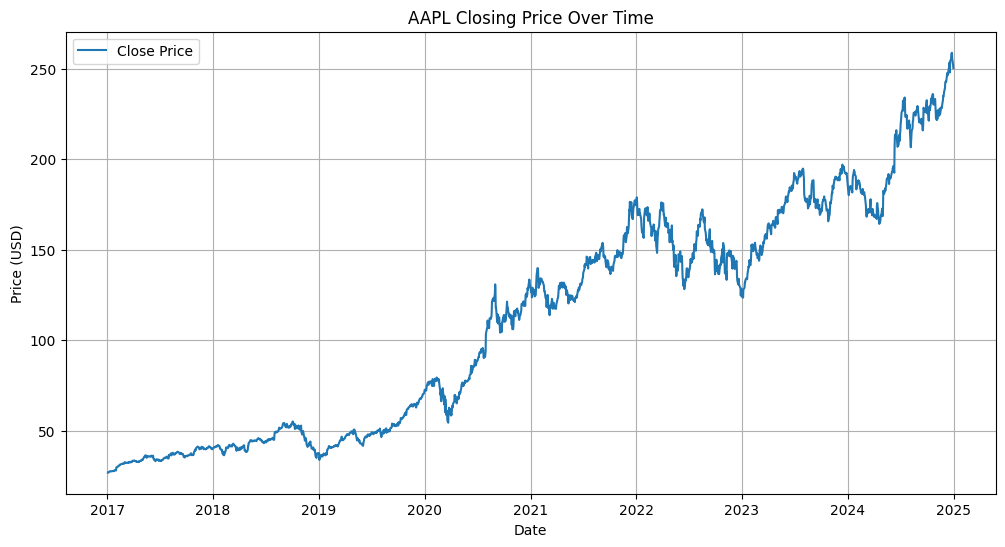

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


## Plot Trading Volume Over Time
Volume spikes usually signal news/events — can be predictive.

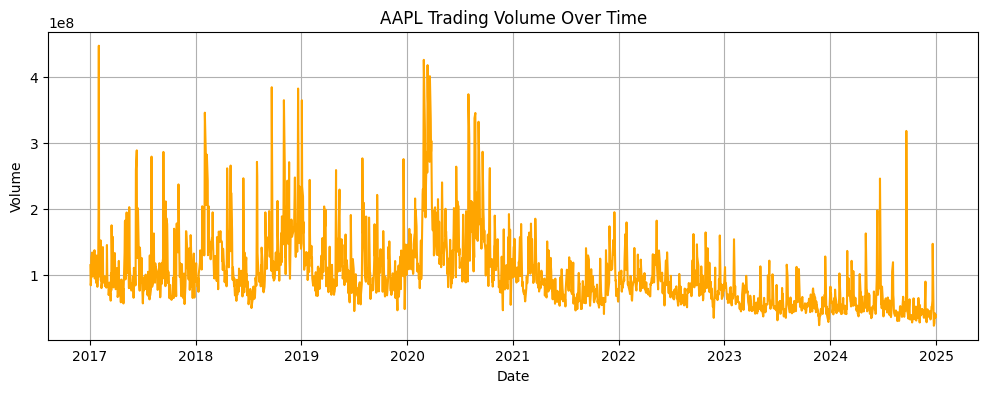

In [62]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


## Plot Moving Averages (10-day & 100-day)

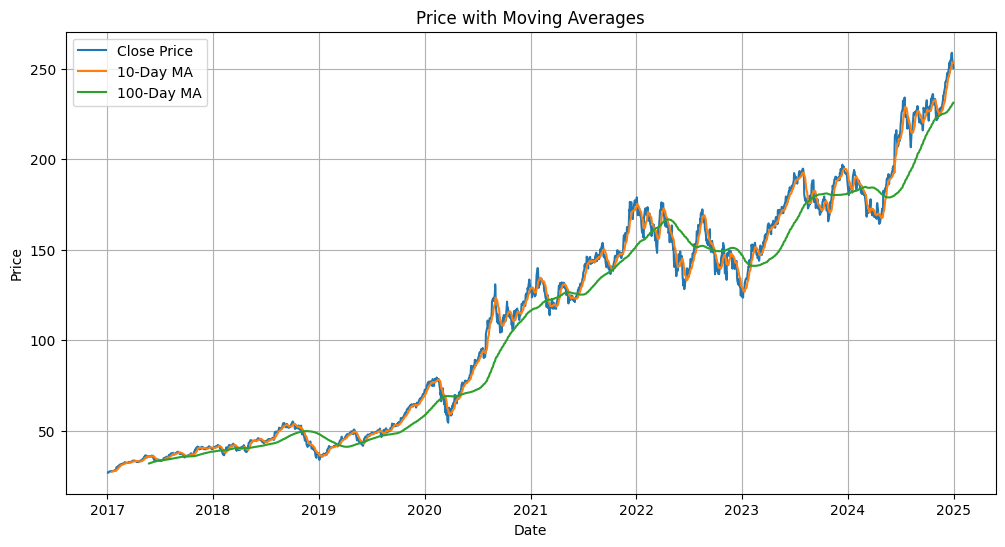

In [63]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_10'], label='10-Day MA')
plt.plot(df['Date'], df['MA_100'], label='100-Day MA')
plt.title('Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Check Correlation Between Features
Helps you understand which features are most related to Close

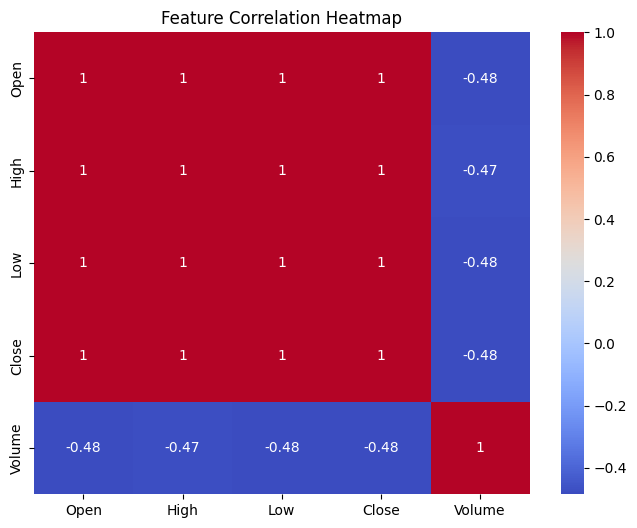

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## Look at Distribution of Prices
Reveals outliers, skew, and possible price bands your model should learn

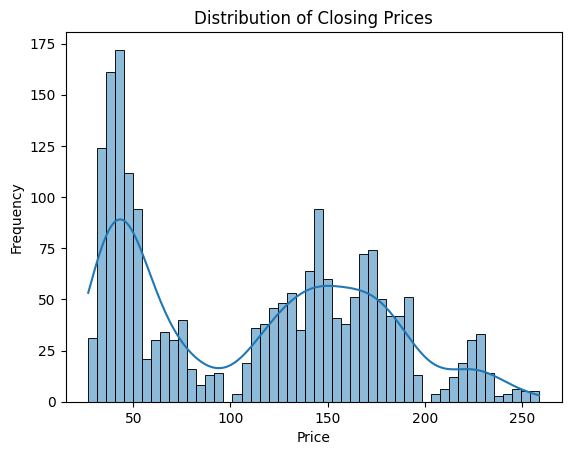

In [65]:
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Check for Missing Dates or Gaps
There's missing data because US market holidays

In [70]:
# Generate expected business days between the min and max date in your dataset
expected_days = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='B')  # 'B' = Business days

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Check which business days are missing from your dataset
missing = expected_days.difference(df['Date'])
print(f"Missing business days: {len(missing)}")
# Print how many and show the actual missing dates
# print(f"Missing business days: {len(missing)}")
# print("\nMissing Dates:")
# print(missing.to_list())

Missing business days: 74


# Exploration Summary

- Data contains daily stock prices for AAPL from Jan 2017 to Dec 2024
- No missing values or major structural issues
- Feature correlation is strong between Open, High, Low, Close
- Volume and Moving Averages will be useful engineered features
- Close price trends show long-term growth with some volatility
- Ready to move into preprocessing and baseline modeling


## Conclusions
- Type of Problem: Regression bc we're predicting future stock price
- Goal: Minimize error (MSE, RMSE)
- Target Variable: Close
- Possible Features: Close, Moving Averages, Lag Values
- Preprocessing: Scale prices, create sequences (for LSTM)
- Shape of x_train and y_train:
- Data Split: 80% for training, 20% for testing
- Baseline Model: Naive, Moving Average
- 1st Model: Simple DNN, then adjust layers/neurons, hyperparameter tuning
- 2nd Model(?): LSTM
- Metrics to Evaluate Performance: Mean Sqaured Error (MSE), Root Mean Squared Error (RMSE), visual plots of predictions vs actual prices
- Risks: Overfitting, Look-ahead bias, data leakage
- How to compare models: keep track of performance (table of MSE for baseline, DNN, LSTM), visual comparison of prediction curves, try different hyperparameters (learning rate, epochs)